In [22]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# Читаем данные
with open("data.json", "r", encoding="utf8") as f:
    data = json.load(f)  

In [62]:
'''
users - массив пользователей
{
name - имя
lastname - фамилия
id - индекс
age - возраст 
child - вероятность наличия ребенка (по заказам)
avto - вероятность наличия транспортного средства (по заказам)
cosmetic - вероятность использования косметики (по заказам)
}
'''
# проверка данных
users = data['users']
users[10]

{'name': 'Екатерина',
 'lastname': 'Петрова',
 'id': 10,
 'age': 36,
 'child': 0.17493094638637535,
 'avto': 0.5018693878957021,
 'cosmetic': 0.39809563870677617}

Задача: определить значение вероятности наличия маленького ребенка (child) у пользователя, обладая информацией только о вероятносте наличия транспортного средства (avto) и использования косметики (cosmetic)

Text(0, 0.5, 'Вероятность использования косметики')

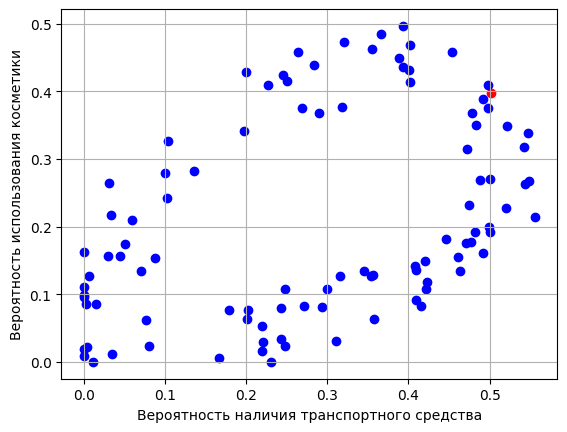

In [63]:
id_ = 10

for user in users:
    color = "r" if user["id"] == id_ else "b"
    plt.scatter(user["avto"], user["cosmetic"], color=color)

plt.grid()
plt.xlabel('Вероятность наличия транспортного средства')
plt.ylabel('Вероятность использования косметики')

In [64]:
def get_user_id(id_):
    for user in users:
        if user["id"] == id_:
            return user

def dist(user1, user2):
    # Расстояние можно считать разными способами
    dx1 = user1["avto"]-user2["avto"] 
    dx2 = user1["cosmetic"]-user2["cosmetic"]
    return np.sqrt(dx1**2+dx2**2)

def get_neighbor_users(id_, k=7):
    # Поиск k ближайших соседей 
    user1 = get_user_id(id_)
    ids = [user2["id"] for user2 in users] 
    dists = [dist(user1, user2) for user2 in users]
    
    index = np.argsort(dists)
    k_neighbors = [ids[i] for i in index[1:k+1]]
    return [get_user_id(id_n) for id_n in k_neighbors]

Text(0, 0.5, 'Вероятность использования косметики')

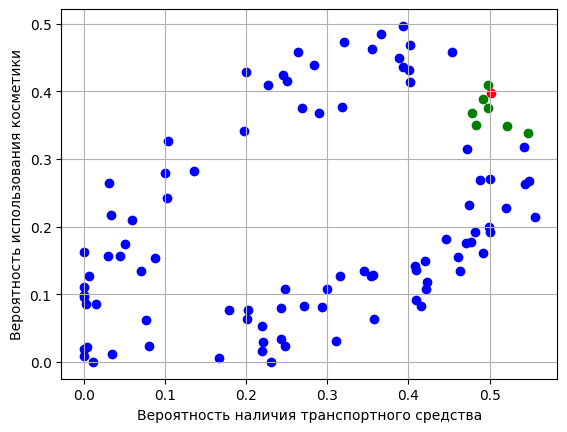

In [65]:
k_neighbor_users = get_neighbor_users(id_)
for user in users:
    if user["id"] == id_:
        color = "r"    
    elif user["id"] in [user["id"] for user in k_neighbor_users]:
        color = "g"
    else:
        color = "b"
    plt.scatter(user["avto"], user["cosmetic"], color=color)

plt.grid()
plt.xlabel('Вероятность наличия транспортного средства')
plt.ylabel('Вероятность использования косметики')

In [66]:
def get_child(id_, k=7):
    k_neighbor_users = get_neighbor_users(id_, k=k)
    child_args = [user["child"] for user in k_neighbor_users]
    return np.mean(child_args)

def test_child(id_, k=7):
    x1 = get_user_id(id_)["child"]
    x2 = get_child(id_, k=k)
    return abs(x1-x2)

In [67]:
count_neighbors = []
max_error = []
mean_error = []
for k in range(2, 20):
    rez = [test_child(i, k =k) for i in range(100)]
    max_error.append(np.max(rez))
    mean_error.append(np.mean(rez))
    count_neighbors.append(k)

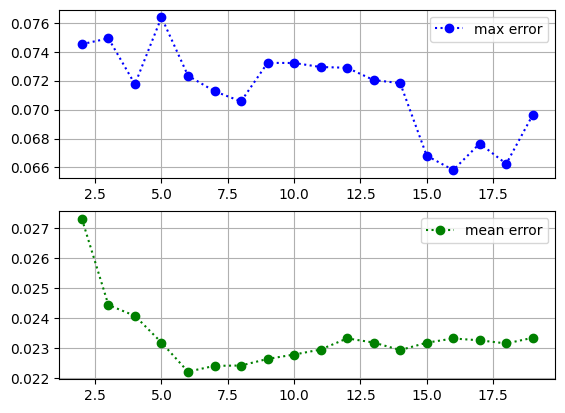

In [68]:
plt.subplot(2,1, 1)
plt.plot(count_neighbors, max_error, 'b:o', label='max error')
plt.grid()
plt.legend()
plt.subplot(2,1, 2)
plt.plot(count_neighbors, mean_error, 'g:o', label='mean error')
plt.legend()
plt.grid()

Text(0, 0.5, 'Вероятность использования косметики')

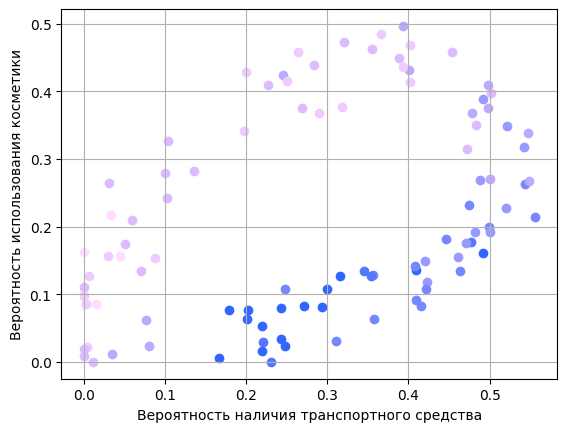

In [60]:
colors = ['#3366ff', '#5577ff', '#7788ff', '#9999ff', '#bbaaff', '#ddbbff', '#eeccff', '#ffddff']
for user in users:
    int_color = int(30*user["child"])
    color = colors[int_color]
    plt.scatter(user["avto"], user["cosmetic"], color=color)

plt.grid()
plt.xlabel('Вероятность наличия транспортного средства')
plt.ylabel('Вероятность использования косметики')

Text(0, 0.5, 'Вероятность использования косметики')

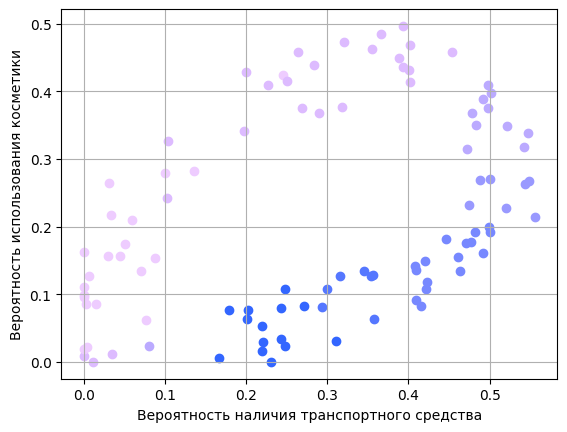

In [61]:
colors = ['#3366ff', '#5577ff', '#7788ff', '#9999ff', '#bbaaff', '#ddbbff', '#eeccff', '#ffddff']
for user in users:
    int_color = int(30*get_child(user['id']))
    color = colors[int_color]
    plt.scatter(user["avto"], user["cosmetic"], color=color)

plt.grid()
plt.xlabel('Вероятность наличия транспортного средства')
plt.ylabel('Вероятность использования косметики')